# Tree structure & Category Products

Exploring categories using [anytree] library

[anytree]: https://pypi.org/project/anytree/2.8.0/

In [2]:
import os
os.chdir('/home/app/src')

from anytree import Node
from anytree import RenderTree, find, find_by_attr, findall
import json
from urllib.request import urlopen
import pandas as pd
from utils import tree_utils
from IPython import display


In [3]:
prod_open = urlopen('https://raw.githubusercontent.com/anyoneai/e-commerce-open-data-set/master/products.json')
js_prod = json.loads(prod_open.read().decode('utf-8'))

**Next Step**:  integrate with `build_df.py` that allows build a dataframe setting a treshold for minimun amount of products by category

This task is adressed in `model_training/integration_pd_build_and_make_tree.ipynb` and first applied in `model_training/prepare_dataset.ipynb` tutorial notebook

In [4]:
df_prod = pd.DataFrame(js_prod)
df_prod.head()

,sku,name,type,price,upc,category,shipping,description,manufacturer,model,url,image
0,43900,Duracell - AAA Batteries (4-Pack),HardGood,5.49,041333424019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AAA...,Duracell,MN2400B4Z,http://www.bestbuy.com/site/duracell-aaa-batte...,http://img.bbystatic.com/BestBuy_US/images/pro...
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),HardGood,5.49,041333415017,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Long-lasting energy; DURALOCK Power Preserve t...,Duracell,MN1500B4Z,http://www.bestbuy.com/site/duracell-aa-1-5v-c...,http://img.bbystatic.com/BestBuy_US/images/pro...
2,127687,Duracell - AA Batteries (8-Pack),HardGood,7.49,041333825014,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AA ...,Duracell,MN1500B8Z,http://www.bestbuy.com/site/duracell-aa-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...
3,150115,Energizer - MAX Batteries AA (4-Pack),HardGood,4.99,039800011329,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,4-pack AA alkaline batteries; battery tester i...,Energizer,E91BP-4,http://www.bestbuy.com/site/energizer-max-batt...,http://img.bbystatic.com/BestBuy_US/images/pro...
4,185230,Duracell - C Batteries (4-Pack),HardGood,8.99,041333440019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; C s...,Duracell,MN1400R4Z,http://www.bestbuy.com/site/duracell-c-batteri...,http://img.bbystatic.com/BestBuy_US/images/pro...


First, we created the tree using `make_tree()` function that is located on `utils/tree_utils.py`. This function creates the tree but also stores a dictionary: `tree_dict` variable in order to use with our `dist_nodes()` function 

The reader can find the code in python file just mentioned and also in the `model_training/integration_pd_build_and_make_tree.ipynb` notebook

In [5]:
tree_dict = tree_utils.make_tree(df_prod, df_prod['category'], "Categories", display_tree=True)

Categories - All categories
├── pcmcat312300050015 - Connected Home & Housewares
│   ├── pcmcat248700050021 - Housewares
│   │   ├── pcmcat303600050001 - Household Batteries
│   │   │   ├── abcat0208002 - Alkaline Batteries
│   │   │   ├── abcat0208006 - Specialty Batteries
│   │   │   ├── abcat0208005 - Rechargeable Batteries
│   │   │   └── abcat0208003 - Lithium Batteries
│   │   ├── pcmcat179100050006 - Outdoor Living
│   │   │   ├── pcmcat179200050003 - Grills
│   │   │   │   ├── pcmcat179200050004 - Gas Grills
│   │   │   │   ├── pcmcat179200050007 - Grill Accessories
│   │   │   │   ├── pcmcat179200050005 - Electric Grills
│   │   │   │   ├── pcmcat270300050004 - Charcoal Grills
│   │   │   │   └── pcmcat270300050005 - Smokers
│   │   │   ├── pcmcat179200050017 - Outdoor Audio
│   │   │   ├── pcmcat179200050008 - Patio Furniture & Decor
│   │   │   │   ├── pcmcat179200050009 - Fire Pits
│   │   │   │   ├── pcmcat748300323222 - Outdoor Furniture Sets
│   │   │   │   │   ├── pcmca

## Distance between nodes
First we created our `dist_nodes()` function, located also in scripts folder. 

### Applying `dist_nodes()` function 
This function determines the distance between two given nodes


**Example 1** we apply `dist_nodes()` function to determine the distance between *pcmcat303600050001 Household Batteries* and *pcmcat179200050005 Electric Grills*. 

They have as common parent *pcmcat248700050021 Housewares*

In [9]:
node1 = 'pcmcat179200050005' # Electric Grills
node2 = 'pcmcat303600050001' #Household Batteries'

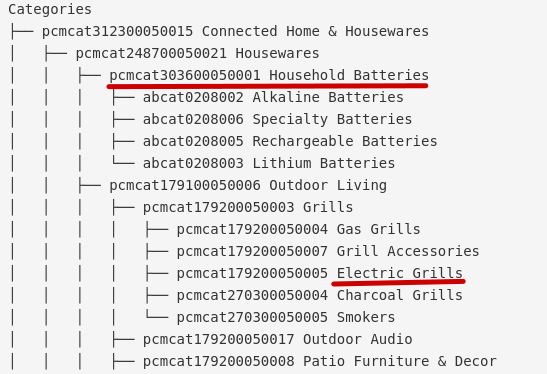

In [10]:
display.Image("/home/app/src/EDA/tree_ex1.png")

In [11]:
print(tree_utils.dist_nodes(node1, node2, tree_dict))
tree_utils.dist_nodes(node1, node2, tree_dict) == tree_utils.dist_nodes(node2, node1, tree_dict)

3


True

**Example 2** we apply `dist_nodes()` function to determine the distance between *abcat0208005 Rechargeable Batteries* and *abcat0208003 Lithium Batteries*. 

Both belong to the same subcategory: *pcmcat303600050001 Household Batteries*

In [12]:
node1 = 'abcat0208005' # Rechargeable Batteries
node2 = 'abcat0208003' # Lithium Batteries

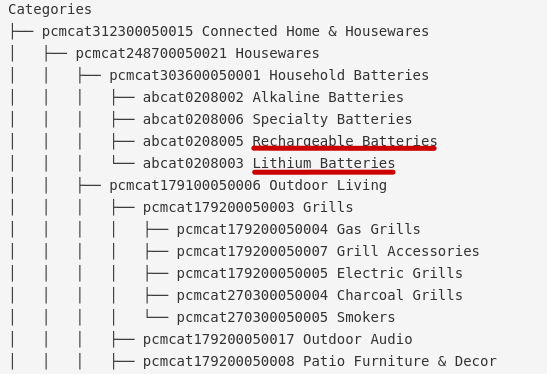

In [13]:
display.Image("/home/app/src/EDA/tree_ex_2.png")

In [14]:
print(tree_utils.dist_nodes(node1, node2, tree_dict))
tree_utils.dist_nodes(node1, node2, tree_dict) == tree_utils.dist_nodes(node2, node1, tree_dict)

1


True